
# Problem Statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next. The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [25]:
#Import the library
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd

In [26]:
#Reading the dataset
df=pd.read_csv('Data/ex1data1.txt',header=None)
X=np.array(df[0])
y=np.array(df[1])
print("X Shape",X.shape)
print("Y Shape",y.shape)

X Shape (97,)
Y Shape (97,)


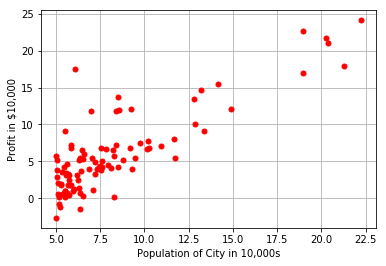

In [27]:
#visualize datasetd
pyplot.plot(X,y,'ro',ms=5)
pyplot.xlabel("Population of City in 10,000s")
pyplot.ylabel("Profit in $10,000")
pyplot.grid()

In [28]:
#Reshaping X and Concatenate 1
X=X.reshape(len(X),1)
X=np.concatenate((np.ones(X.size).reshape(len(X),1),X),axis=1)
print(X.shape)

(97, 2)


In [30]:
def costfunction(X,y,theta):
    m=len(X)
    J=(1/(2*m))*np.sum(np.square(X.dot(theta)-y))
    return J

In [31]:
J = costfunction(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = costfunction(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [32]:
def gradientdescent(X,y,theta,epoch,alpha):
    J=[]
    m=len(X)
    
    for i in range((epoch)):
        theta=theta-(alpha/m)*(X.dot(theta)-y).dot(X)
        J.append(costfunction(X,y,theta))
    return J,theta

In [33]:
J,theta=gradientdescent(X,y,np.zeros(2),1500,0.01)

In [34]:
print("Optimal theta {theta} after {epoch}".format(epoch=500,theta=theta))

Optimal theta [-3.63029144  1.16636235] after 500


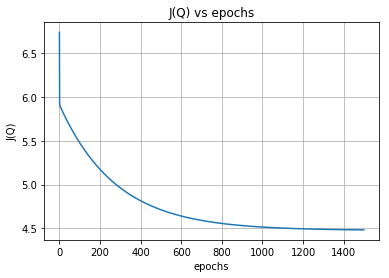

In [36]:
pyplot.title("J(Q) vs epochs")
pyplot.xlabel("epochs")
pyplot.ylabel("J(Q)")
pyplot.grid()
pyplot.plot(J)

Text(0, 0.5, 'Profit in $10,000')

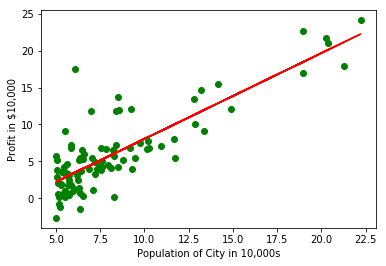

In [37]:
pyplot.plot(X[:,1],y,'go')
pyplot.plot(X[:,1],X.dot(theta),'r')
pyplot.xlabel("Population of City in 10,000s")
pyplot.ylabel("Profit in $10,000")

# Question

In [38]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45

